# Setup

In [1]:
#
# Download https://github.com/smutchler/trilabytePyML to a ZIP file and
# place subfoler into C:\
#
# You should have this exact path when done correctly: C:\TrilabytePyML\trilabytePyML\AutoForecast.py

In [2]:
import sys

if 'TrilabytePyML' not in sys.path:
    sys.path.insert(1, 'C:\\TrilabytePyML')

# Data Preparation

In [3]:
import pandas as pd

pd.options.mode.chained_assignment = None

frame = pd.read_csv('C:\\TrilabytePyML\\samples\\retail_unit_demand.csv')
display(frame)

,SKU,STORE_NUMBER,CAL_YEAR,CAL_MONTH,CAL_DATE,UNIT_DEMAND,PREDICTOR_1,PREDICTOR_2,PREDICTOR_3,PREDICTOR_4
0,1100,1150,2016,3,3/1/2016,16.0,1.856107,4.916073,6.350111,0.170545
1,1100,1150,2016,4,4/1/2016,28.0,9.803075,5.647253,40.128298,0.190157
2,1100,1150,2016,5,5/1/2016,35.0,3.598739,15.927959,29.807851,0.006683
3,1100,1150,2016,6,6/1/2016,129.0,1.155522,48.465667,17.236057,0.007743
4,1100,1150,2016,7,7/1/2016,179.0,9.673028,6.603080,39.144862,0.230874
...,...,...,...,...,...,...,...,...,...,...
113,1733,993243,2019,8,8/1/2019,NaN,5.563396,13.576681,12.819330,0.038417
114,1733,993243,2019,9,9/1/2019,NaN,6.663194,43.053491,11.374827,0.144381
115,1733,993243,2020,10,10/1/2020,NaN,2.270636,29.233220,59.000652,0.288833
116,1733,993243,2020,11,11/1/2020,NaN,4.903307,49.802078,27.008816,0.017463


# Forecast Options

In [4]:
options = dict()
options['method'] = 'Auto' #'Auto','MLR','ARIMA','Prophet'
options['sortColumns'] = ['SKU','STORE_NUMBER','CAL_YEAR','CAL_MONTH']
options['splitColumns'] = ['SKU','STORE_NUMBER']
options['predictorColumns'] = ['PREDICTOR_1','PREDICTOR_2','PREDICTOR_3','PREDICTOR_4']
options['targetColumn'] = 'UNIT_DEMAND'
options['timestampColumn'] = 'CAL_DATE' #only needed by Prophet model  
options['periodicity'] = 12
options['autoDetectOutliers'] = True
options['outlierStdevMultiplier'] = 3.0
options['seasonalityBandwidth'] = 0.6
options['scalePredictors'] = True # MLR only; if true X_COEFFICIENTS become variable importances
options['ridgeAlpha'] = 1.0
options['forceNonNegative'] = True
options['seasonality'] = 'Auto' #'Auto','Additive','Multiplicative'
options['hypertune'] = False
# how may rows are used for holdout (MAPE calculation)
options['numHoldoutRows'] = 6
# pass-through to FBProphet
options['interval_width'] = 0.95
options['changepoint_prior_scale'] = 0.05 
options['holidays_prior_scale'] = 10.0
options['changepoints_fraction'] = 0.1 # number of change points allowed as fraction of rowcount

# Visualizations (first frame only)

In [5]:
# limit data to first combination (so that visualizations below work)
firstFrame = frame[frame['SKU'] == 1100].dropna()

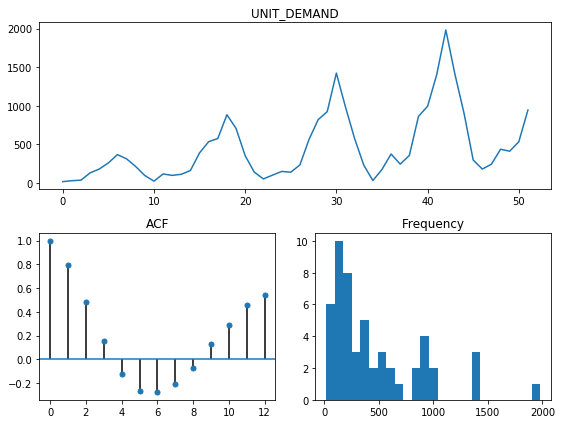

In [6]:
import pmdarima as pm

# Time Series Plot, ACF Plot and Histogram of Frequency
pm.tsdisplay(firstFrame[options['targetColumn']], lag_max=options['periodicity'], title=options['targetColumn'], show=True) 

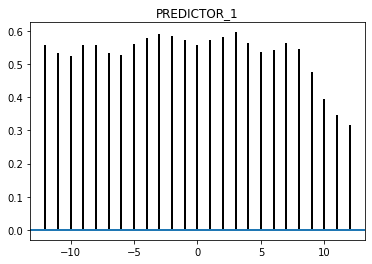

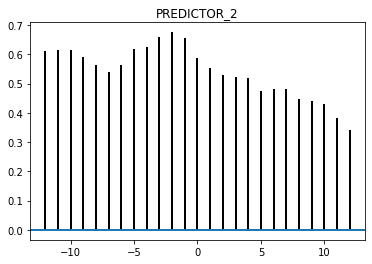

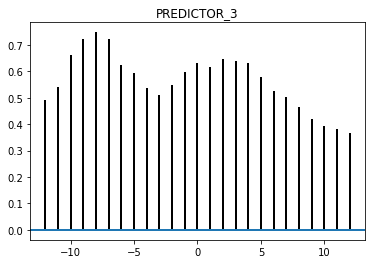

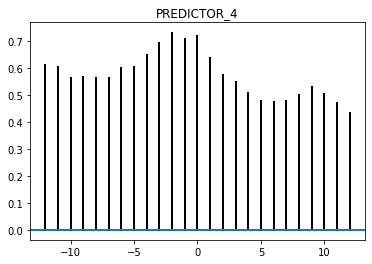

In [7]:
import matplotlib.pyplot as plt
import numpy as np

for predCol in options['predictorColumns']:
    if (predCol != 'X_INDEX'):
        plt.xcorr(firstFrame[predCol], firstFrame[options['targetColumn']], usevlines=True, maxlags=options['periodicity'], normed=True, lw=2)
        plt.title(predCol)
        plt.show()

In [8]:
import seaborn as sns

def cross_correlation_heatmap(cc_df):
    # Credit to Bibor Szabo
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
    
    plt.figure(figsize=(16, 6))

    mask = np.triu(np.ones_like(cc_df.corr(), dtype=np.bool))
    heatmap = sns.heatmap(cc_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Cross Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
    plt.savefig('cc_heatmap.png', dpi=300, bbox_inches='tight')
       
    return()

()

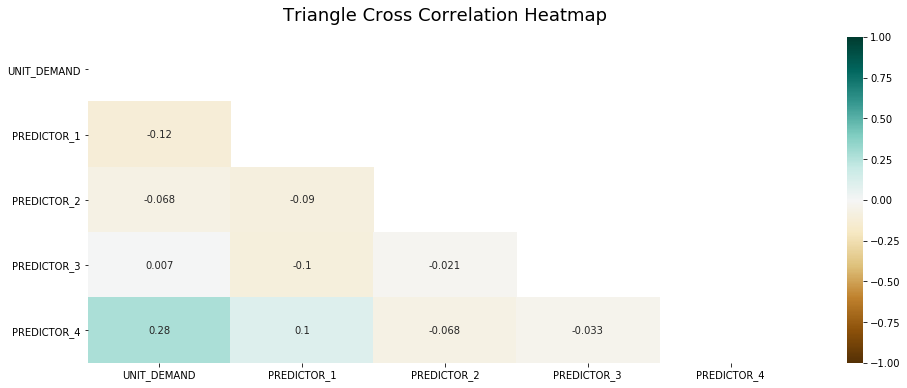

In [9]:
all_vars = [options['targetColumn']] + options['predictorColumns']
if ('X_INDEX' in all_vars):
    all_vars.remove('X_INDEX')
cross_correlation_heatmap(firstFrame[all_vars])

# Forecast Generation

In [5]:
import trilabytePyML.AutoForecast as af

frame = af.splitFramesAndForecast(frame, options)

display(frame)

Importing plotly failed. Interactive plots will not work.


Auto MAPEs (MLR, ARIMA, Prophet, Ensemble):  [22.503611901654835, 67.31028940421372, 41.32512193983904, 32.65491407199097]
Auto MAPEs (MLR, ARIMA, Prophet, Ensemble):  [25.897355035127127, 137.79352622628406, 28.813332008822794, 26.47600050328857]


,SKU,STORE_NUMBER,CAL_YEAR,CAL_MONTH,CAL_DATE,UNIT_DEMAND,PREDICTOR_1,PREDICTOR_2,PREDICTOR_3,PREDICTOR_4,...,X_SEASONALITY_TYPE,X_FORECAST,X_MAPE,X_RESIDUAL,X_LPI,X_UPI,X_APE,X_HYPERTUNE,X_ERROR,X_METHOD
0,1100,1150,2016,3,3/1/2016,16.0,1.856107,4.916073,6.350111,0.170545,...,Additive,0.000000,22.503612,-77.297732,0.000000,275.405611,483.111,None,None,MLR
1,1100,1150,2016,4,4/1/2016,28.0,9.803075,5.647253,40.128298,0.190157,...,Additive,0.000000,22.503612,-94.441504,0.000000,270.261839,337.291,None,None,MLR
2,1100,1150,2016,5,5/1/2016,35.0,3.598739,15.927959,29.807851,0.006683,...,Additive,9.414723,22.503612,-25.585277,0.000000,346.118066,73.1008,None,None,MLR
3,1100,1150,2016,6,6/1/2016,129.0,1.155522,48.465667,17.236057,0.007743,...,Additive,292.770951,22.503612,163.770951,0.000000,629.474294,126.954,None,None,MLR
4,1100,1150,2016,7,7/1/2016,179.0,9.673028,6.603080,39.144862,0.230874,...,Additive,482.627179,22.503612,303.627179,145.923836,819.330522,169.624,None,None,MLR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1733,993243,2019,8,8/1/2019,NaN,5.563396,13.576681,12.819330,0.038417,...,Multiplicative,1488.750999,25.897355,NaN,1296.968593,1680.533405,NaN,None,None,MLR
114,1733,993243,2019,9,9/1/2019,NaN,6.663194,43.053491,11.374827,0.144381,...,Multiplicative,2085.776712,25.897355,NaN,1893.994307,2277.559118,NaN,None,None,MLR
115,1733,993243,2020,10,10/1/2020,NaN,2.270636,29.233220,59.000652,0.288833,...,Multiplicative,1627.295316,25.897355,NaN,1435.512910,1819.077721,NaN,None,None,MLR
116,1733,993243,2020,11,11/1/2020,NaN,4.903307,49.802078,27.008816,0.017463,...,Multiplicative,842.004640,25.897355,NaN,650.222234,1033.787046,NaN,None,None,MLR


In [6]:
frame.to_csv('c:\\temp\\output.csv')